area_price_nl.csv
3458497.0
53583.453
53570.207
53558.06
53546.92
53536.72
53527.383
53518.805
53510.95
53503.76
53497.16
53491.113
Model parameters:
[[220.7399 ]
 [591.3307 ]
 [306.69608]]
bias:1474.944214


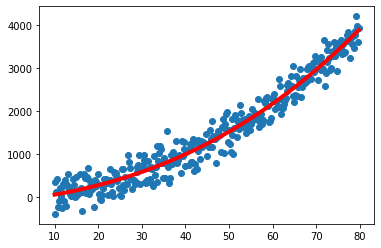

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd


# Method to read the csv file
def load_data(file_name):
    print(file_name)
    column_names = ['area', 'price']
    # To read columns
    io = pd.read_csv(file_name, names=column_names, header=None)
    x_val = (io.values[1:, 0])
    y_val = (io.values[1:, 1])
    size_array = len(y_val)
    for i in range(size_array):
        x_val[i] = float(x_val[i])
        y_val[i] = float(y_val[i])
    return x_val, y_val


def feature_normalize(train_x):
    global mean, std
    mean = np.mean(train_x, axis=0)
    std = np.std(train_x, axis=0)
    return (train_x - mean) / std


# Call the method for a specific file
x_raw, y_raw = load_data('area_price_nl.csv')
# x_raw, y_raw = load_data('kc_house_data.csv')
size_data = len(y_raw)
y_raw = y_raw.reshape(size_data, 1)

# X_t, X_test, y_t, y_test = train_test_split(x_raw, y_raw, test_size=0.2, random_state=42)

# model parameters
# order of polynomial
n = 3
W = tf.Variable(tf.random_normal([n, 1]), name='weight')
# bias
b = tf.Variable(tf.random_normal([1]), name='bias')

# X=tf.placeholder(tf.float32,shape=(None,2))
X = tf.placeholder(tf.float32, shape=[None, n])
Y = tf.placeholder(tf.float32, shape=[None, 1])


# preparing the data
def modify_input(x, x_size, n_value):
    x_new = np.zeros([x_size, n_value])
    for i in range(n):
        x_new[:, i] = np.power(x, (i + 1))
        mean_l = np.mean(x_new[:, i], axis=0)
        std_l = np.std(x_new[:, i], axis=0)
        x_new[:, i] = (x_new[:, i] - mean_l) / std_l
        # x_new[:, i] = x_new[:, i] / np.max(x_new[:, i])
    return x_new


# model
x_modified = modify_input(x_raw, x_raw.size, n)
Y_pred = tf.add(tf.matmul(X, W), b)

# algortihm
loss = tf.reduce_mean(tf.square(Y_pred - Y))
# training algorithm
optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
# initializing the variables
init = tf.global_variables_initializer()

# starting the session session
sess = tf.Session()
sess.run(init)

epoch = 12000

for step in range(epoch):
    _, c = sess.run([optimizer, loss], feed_dict={X: x_modified, Y: y_raw})
    if step % 1000 == 0:
        print(c)

print("Model parameters:")
print(sess.run(W))

print("bias:%f" % sess.run(b))

# comparing our model
y_test = sess.run(Y_pred, feed_dict={X: x_modified})
plt.scatter(x_raw, y_raw)
plt.plot(x_raw, y_test, linewidth=4.0, color='red')
plt.show()